In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
%cd "C:\DSBA\Applied ML\Datathon"

C:\DSBA\Applied ML\Datathon


In [4]:
df=pd.read_csv('training_v2.csv')
df_dict=pd.read_csv('WiDS Datathon 2020 Dictionary.csv')

In [144]:
#df.corr().to_csv('Correlation.csv')

In [16]:
df_hosp=df['hospital_id'].value_counts().rename_axis('hospital_id').reset_index(name='counts')
df_hosp.sort_values(by=['counts'],ascending=False)

,hospital_id,counts
0,118,4333
1,19,3925
2,188,3095
3,161,2792
4,70,2754
...,...,...
142,4,7
143,23,7
144,93,6
145,95,6


In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [7]:
dtyp=df.dtypes
dtyp=pd.DataFrame({'column':dtyp.index, 'Type':dtyp.values})

In [8]:
#updated DIctionary

In [9]:
null_cnt=pd.merge(null_cnt,dtyp,on='column',how='inner')
#pd.merge(df_dict,null_cnt,on='column',how='left').to_csv('Dictionary_ver_1.0.csv')

NameError: name 'null_cnt' is not defined

In [10]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [ ]:
##Remove columns where missing values perecentage is more than specified number

In [4]:
def rem_missg(df,N,n):
    null_cnt=df.isnull().sum()
    null_cnt=pd.DataFrame({'column':null_cnt.index, 'NULL count':null_cnt.values})
    null_cnt['Null Pert']=(null_cnt['NULL count']/df.shape[0])*100
    
    #Plot
    data=null_cnt.sort_values(by='Null Pert',ascending='False')
    data=data.tail(n)
    plot_bar_x(data)
    #fig,miss_null=sns.barplot(x='column',y='Null Pert',data=data, color="g").set_title('Columns with % of Missing values')
    #miss_null.set_xticklabels(miss_null.get_xticklabels(), rotation=45)
    #for item in miss_null.get_xticklabels():
    #    item.set_rotation(45)
    
    null_cnt=null_cnt[~(null_cnt['Null Pert']>N)]
    return null_cnt['column'].tolist()

In [5]:
def plot_bar_x(data):
    # this is for plotting purpose
    plt.rcParams["figure.figsize"] = (20,6)
    index = np.arange(data.shape[0])
    plt.bar(data['column'], data['Null Pert'])
    plt.xlabel('Feature', fontsize=10)
    plt.ylabel('% of missing', fontsize=10)
    #label=plt.set_xticklabels(data['column'].tolist())
    plt.xticks(index, fontsize=10, rotation=90)
    plt.title('% of NULL')
    plt.show()

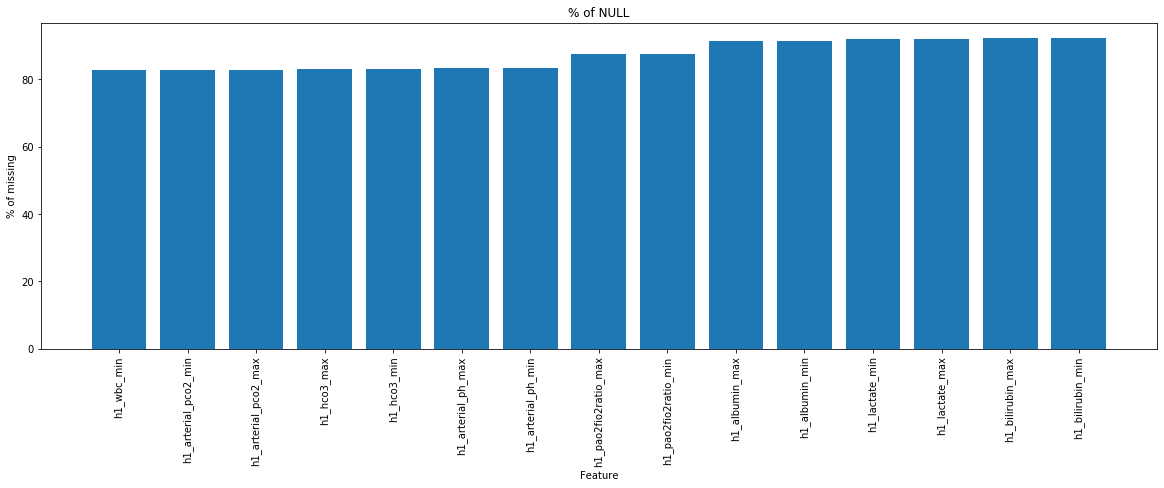

(91713, 131)

In [6]:
df=pd.read_csv('training_v2.csv')
column_list=rem_missg(df,70,15)#Dataframe, missing %, top how many columns
df=df[column_list]
df.shape

In [ ]:
##Missing data

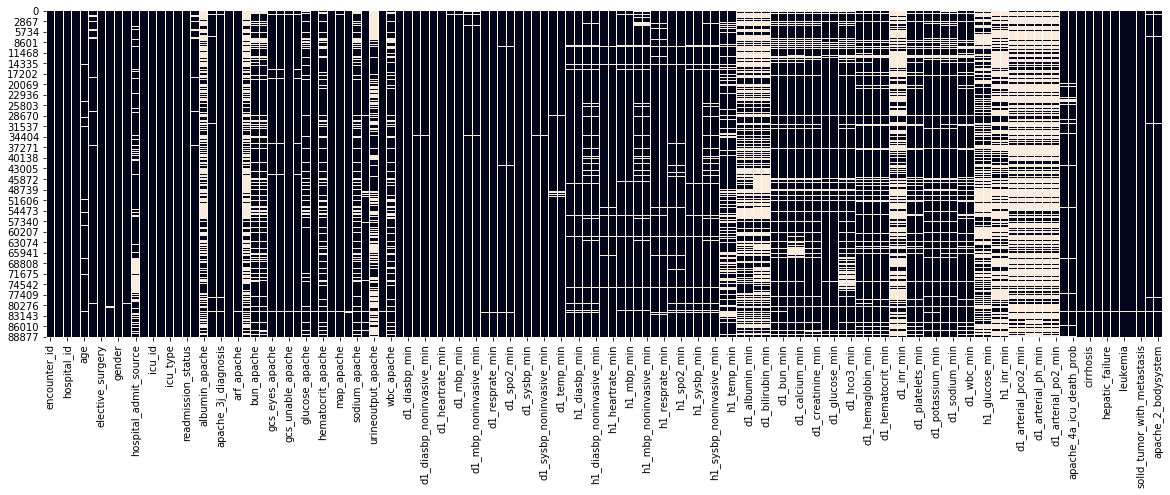

In [16]:
missingdata_df = df.columns[df.isnull().any()].tolist()
#plt.rcParams["figure.figsize"] = (20,6)
sns.heatmap(df.isnull(), cbar=False)

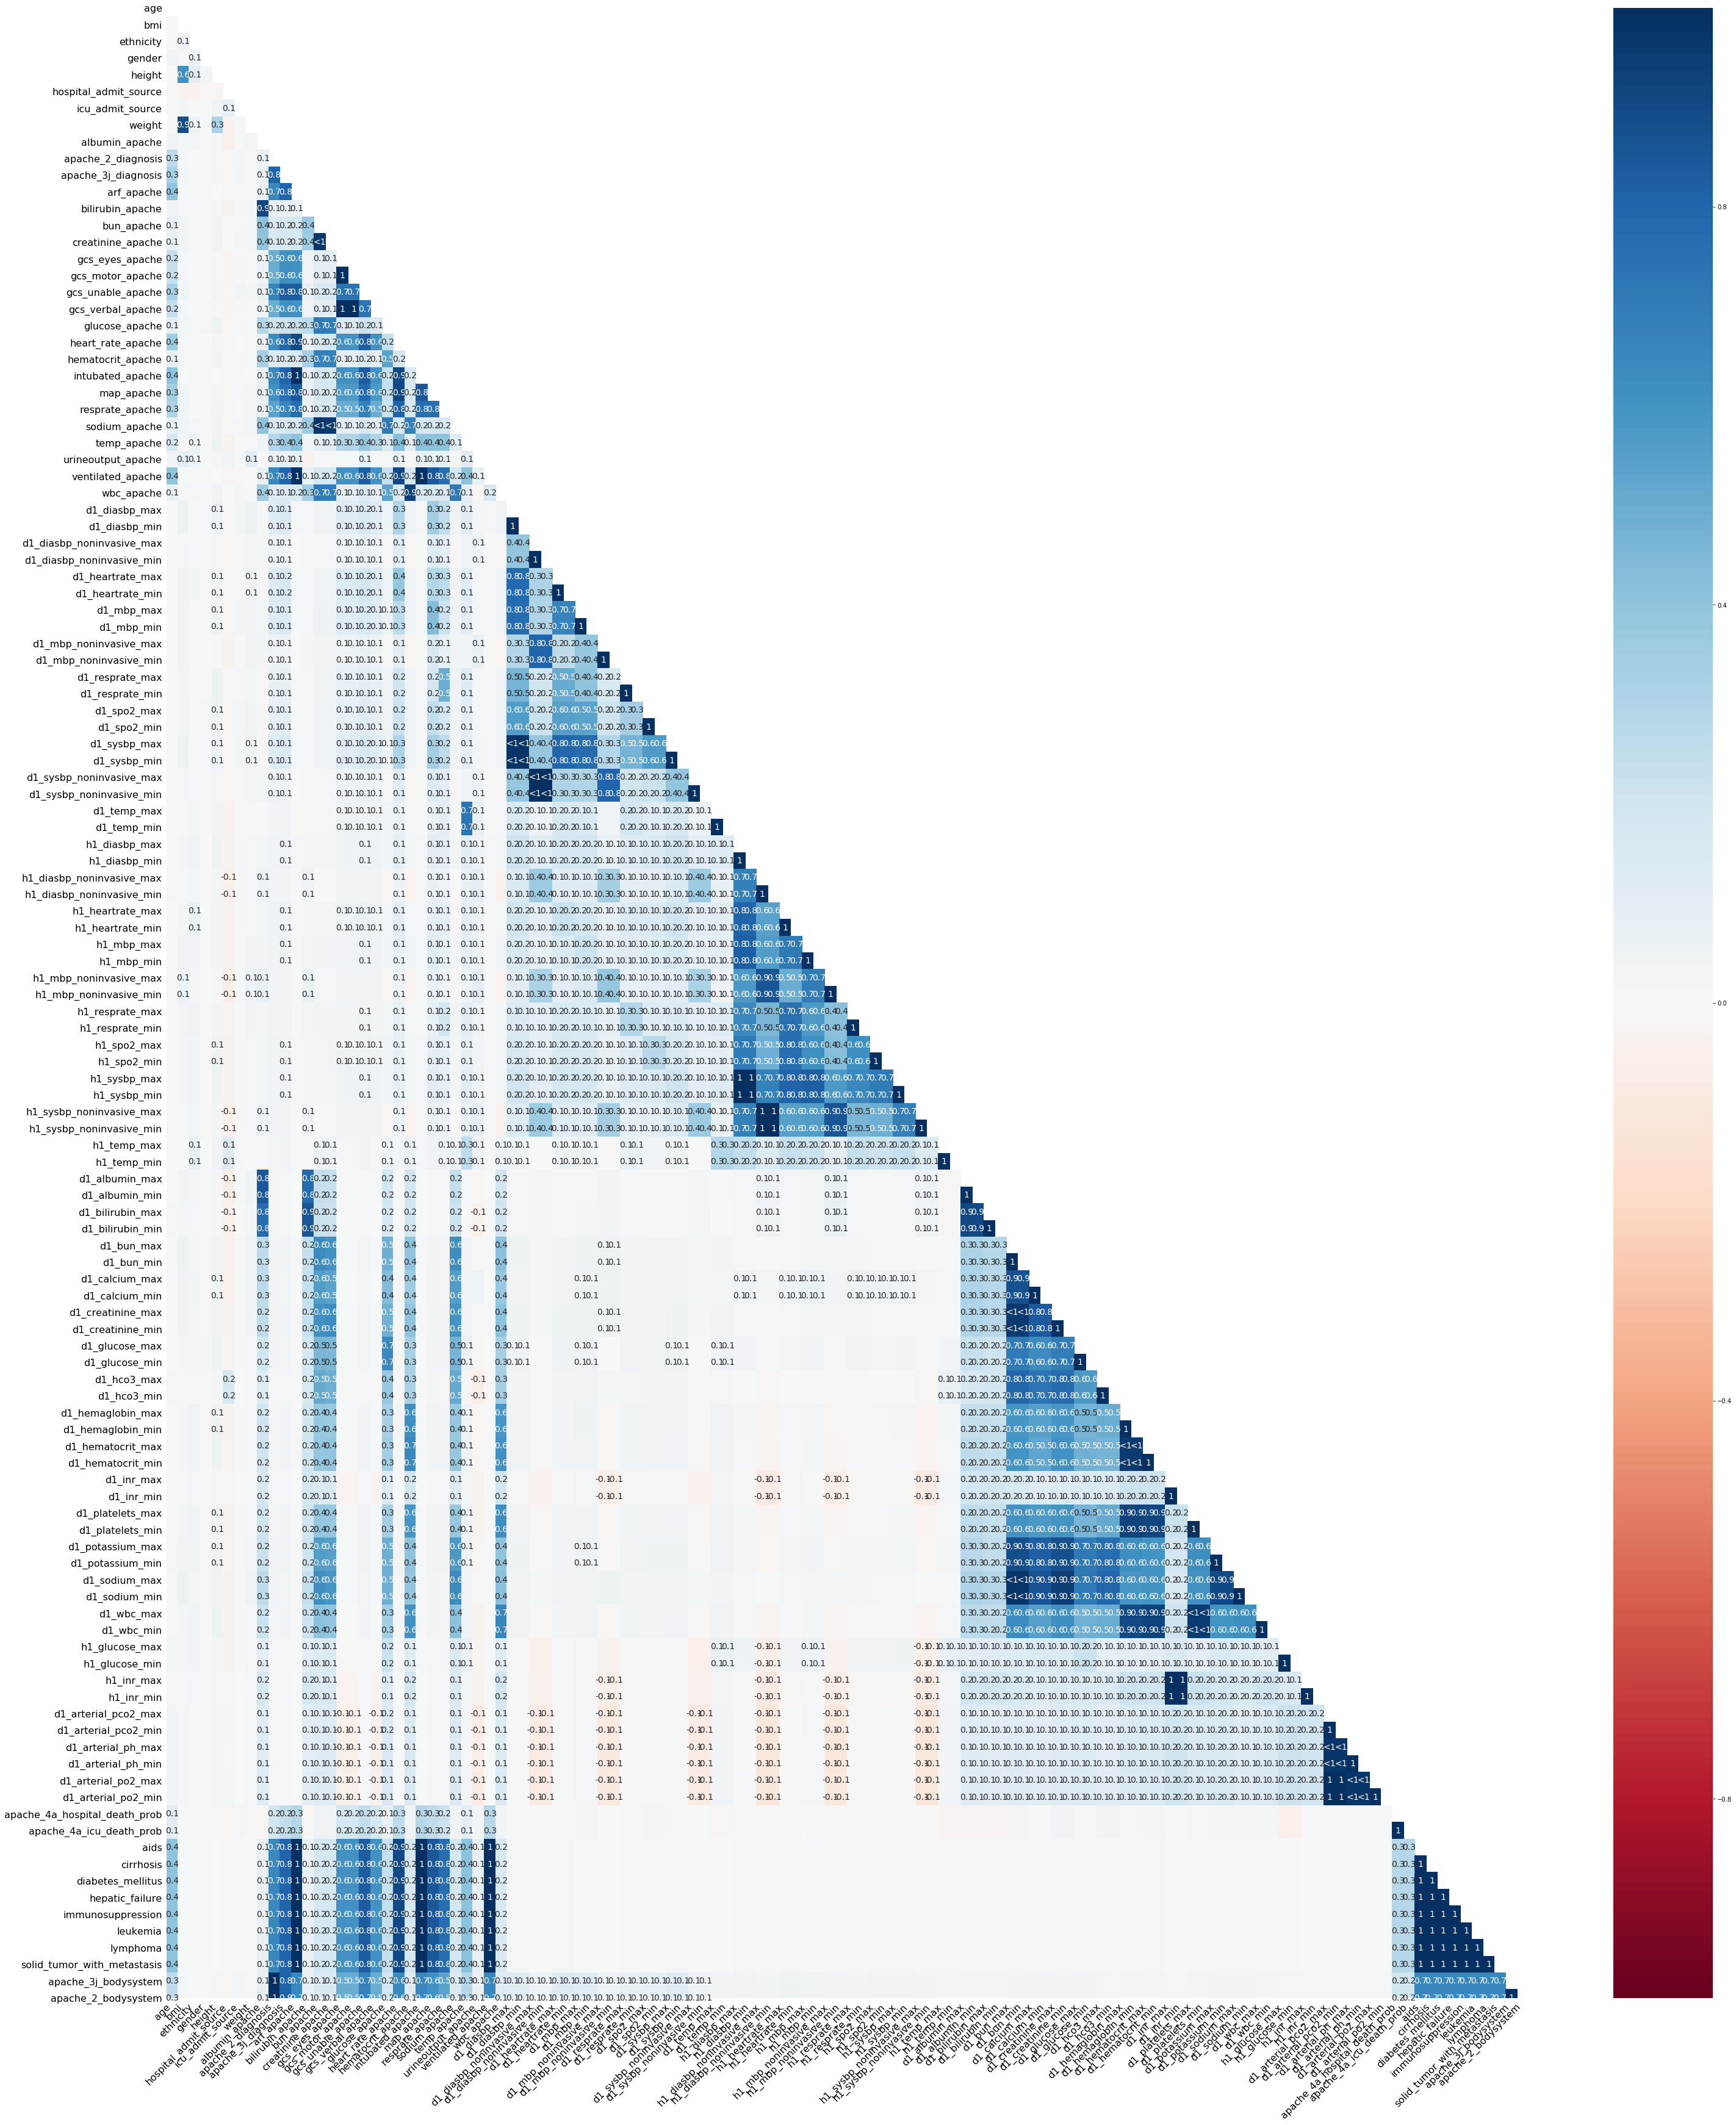

In [15]:
msno.heatmap(df[missingdata_df], figsize=(50,60))

In [ ]:
##Check missing values by disease

In [4]:
df_dict=pd.read_excel('C:\DSBA\Applied ML\Datathon\Dictionary_ver_1.0.xlsx',sheet_name='Temp')

In [5]:
data=df[df_dict['Req_col'].tolist()]
data.head(20)

,age,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,...,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.000000,51.000000
2,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,...,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.000000,337.000000
4,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,67.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,...,370.0,370.000000,43.0,43.0,7.42,7.42,370.0,370.0,370.000000,370.000000
7,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,...,92.0,92.000000,60.0,60.0,7.14,7.14,92.0,92.0,92.000000,92.000000
9,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*THere seems to be a patern, all vitals and lab seems to be missing for some records*

In [12]:
    null_cnt=data.isnull().sum()
    null_cnt=pd.DataFrame({'column':null_cnt.index, 'NULL count':null_cnt.values})
    null_cnt['Null Pert']=(null_cnt['NULL count']/df.shape[0])*100
    null_cnt

,column,NULL count,Null Pert
0,age,4228,4.610033
1,aids,715,0.779606
2,cirrhosis,715,0.779606
3,diabetes_mellitus,715,0.779606
4,hepatic_failure,715,0.779606
...,...,...,...
71,h1_arterial_ph_min,76424,83.329517
72,h1_arterial_po2_max,75945,82.807236
73,h1_arterial_po2_min,75945,82.807236
74,h1_pao2fio2ratio_max,80195,87.441257


In [ ]:
##Lab gas missing cases

In [6]:
data['Lab_gas_missing']=data[['d1_arterial_pco2_max',
                             'd1_arterial_pco2_min',
                             'd1_arterial_ph_max',
                             'd1_arterial_ph_min',
                             'd1_arterial_po2_max',
                             'd1_arterial_po2_min',
                             'd1_pao2fio2ratio_max',
                             'd1_pao2fio2ratio_min',
                             'h1_arterial_pco2_max',
                             'h1_arterial_pco2_min',
                             'h1_arterial_ph_max',
                             'h1_arterial_ph_min',
                             'h1_arterial_po2_max',
                             'h1_arterial_po2_min',
                             'h1_pao2fio2ratio_max',
                             'h1_pao2fio2ratio_min']].count(axis=1)

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [7]:
miss_data=data[data['Lab_gas_missing']==0]

In [ ]:
##Total cases of all diseases

In [8]:
print('aids: ',data[data['aids']==1].shape[0]), 
print('cirrhosis: ',data[data['cirrhosis']==1].shape[0]),
print('diabetes_mellitus: ',data[data['diabetes_mellitus']==1].shape[0])
print('hepatic_failure: ',data[data['hepatic_failure']==1].shape[0])
print('immunosuppression: ',data[data['immunosuppression']==1].shape[0])
print('leukemia: ',data[data['leukemia']==1].shape[0])
print('lymphoma: ',data[data['lymphoma']==1].shape[0])
print('solid_tumor_with_metastasis: ',data[data['solid_tumor_with_metastasis']==1].shape[0])

aids:  78
cirrhosis:  1428
diabetes_mellitus:  20492
hepatic_failure:  1182
immunosuppression:  2381
leukemia:  643
lymphoma:  376
solid_tumor_with_metastasis:  1878


In [29]:
##Data missing in each case

In [9]:
print('aids: ',miss_data[miss_data['aids']==1].shape[0]), 
print('cirrhosis: ',miss_data[miss_data['cirrhosis']==1].shape[0]),
print('diabetes_mellitus: ',miss_data[miss_data['diabetes_mellitus']==1].shape[0])
print('hepatic_failure: ',miss_data[miss_data['hepatic_failure']==1].shape[0])
print('immunosuppression: ',miss_data[miss_data['immunosuppression']==1].shape[0])
print('leukemia: ',miss_data[miss_data['leukemia']==1].shape[0])
print('lymphoma: ',miss_data[miss_data['lymphoma']==1].shape[0])
print('solid_tumor_with_metastasis: ',miss_data[miss_data['solid_tumor_with_metastasis']==1].shape[0])


aids:  40
cirrhosis:  903
diabetes_mellitus:  12793
hepatic_failure:  766
immunosuppression:  1488
leukemia:  418
lymphoma:  226
solid_tumor_with_metastasis:  1267


In [ ]:
##Vital misisng cases

In [10]:
data['Vital_missing']=data[["d1_diasbp_invasive_max","d1_diasbp_invasive_min","d1_mbp_invasive_max","d1_mbp_invasive_min","d1_sysbp_invasive_max","d1_sysbp_invasive_min","h1_diasbp_invasive_max","h1_diasbp_invasive_min","h1_mbp_invasive_max","h1_mbp_invasive_min","h1_sysbp_invasive_max","h1_sysbp_invasive_min"]].count(axis=1)
data['Labs_missing']=data[["d1_albumin_max","d1_albumin_min","d1_bilirubin_max","d1_bilirubin_min","d1_inr_max","d1_inr_min","d1_lactate_max","d1_lactate_min","h1_albumin_max","h1_albumin_min","h1_bilirubin_max","h1_bilirubin_min","h1_bun_max","h1_bun_min","h1_calcium_max","h1_calcium_min","h1_creatinine_max","h1_creatinine_min","h1_glucose_max","h1_glucose_min","h1_hco3_max","h1_hco3_min","h1_hemaglobin_max","h1_hemaglobin_min","h1_hematocrit_max","h1_hematocrit_min","h1_inr_max","h1_inr_min","h1_lactate_max","h1_lactate_min","h1_platelets_max","h1_platelets_min","h1_potassium_max","h1_potassium_min","h1_sodium_max","h1_sodium_min","h1_wbc_max","h1_wbc_min"]].count(axis=1)

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
##Overall missing cases

In [11]:

miss_summary=data[["apache_3j_bodysystem","aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","Labs_missing","Vital_missing","Lab_gas_missing"]]
miss_summary['Labs_missing']=[1 if x==0 else 0 for x in miss_summary['Labs_missing'].tolist()]
miss_summary['Vital_missing']=[1 if x==0 else 0 for x in miss_summary['Vital_missing'].tolist()]
miss_summary['Lab_gas_missing']=[1 if x==0 else 0 for x in miss_summary['Lab_gas_missing'].tolist()]
#miss_summary['Miss_filter']=data[["Labs_missing","Vital_missing","Lab_gas_missing"]].sum(axis=1)
miss_summary=miss_summary.groupby('apache_3j_bodysystem').sum().reset_index()
miss_summary

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,apache_3j_bodysystem,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Labs_missing,Vital_missing,Lab_gas_missing
0,Cardiovascular,5.0,165.0,7494.0,141.0,444.0,159.0,85.0,308.0,7007,17451,18640
1,Gastrointestinal,4.0,534.0,1772.0,552.0,281.0,54.0,36.0,266.0,1353,6776,6619
2,Genitourinary,4.0,38.0,595.0,31.0,56.0,15.0,13.0,55.0,374,1791,1553
3,Gynecological,0.0,0.0,43.0,0.0,10.0,1.0,0.0,9.0,59,183,209
4,Hematological,1.0,17.0,100.0,11.0,37.0,34.0,13.0,28.0,109,602,540
5,Metabolic,6.0,94.0,2378.0,50.0,76.0,20.0,12.0,61.0,1334,7329,5567
6,Musculoskeletal/Skin,1.0,13.0,290.0,8.0,28.0,8.0,3.0,20.0,257,841,830
7,Neurological,9.0,103.0,2040.0,60.0,252.0,69.0,41.0,278.0,3595,9359,9095
8,Respiratory,16.0,111.0,2192.0,73.0,451.0,81.0,60.0,381.0,2925,9655,5594
9,Sepsis,30.0,318.0,2974.0,237.0,699.0,182.0,105.0,438.0,1231,9558,6603


In [12]:
data['Labs_missing']=[1 if x==0 else 0 for x in data['Labs_missing'].tolist()]
data['Vital_missing']=[1 if x==0 else 0 for x in data['Vital_missing'].tolist()]
data['Lab_gas_missing']=[1 if x==0 else 0 for x in data['Lab_gas_missing'].tolist()]

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
#For aids

In [13]:
data_filt=data[["aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","apache_3j_bodysystem","Labs_missing","Vital_missing","Lab_gas_missing"]]

In [14]:
data_filt

,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,Labs_missing,Vital_missing,Lab_gas_missing
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,0,0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,1,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,0,1,0
91709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,0,0,0
91710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,0,1,0
91711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,1,1,0


In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
#last_expr

In [15]:
for ls in ["aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis"]:
    aid=data_filt[data_filt[ls]==1]
    aid=aid[[ls,"apache_3j_bodysystem","Labs_missing","Vital_missing","Lab_gas_missing"]]
    aid=aid.groupby("apache_3j_bodysystem").sum()
    print(aid)
    

                      aids  Labs_missing  Vital_missing  Lab_gas_missing
apache_3j_bodysystem                                                    
Cardiovascular         5.0             0              4                3
Gastrointestinal       4.0             1              3                3
Genitourinary          4.0             0              4                3
Hematological          1.0             0              1                1
Metabolic              6.0             2              6                3
Musculoskeletal/Skin   1.0             0              1                1
Neurological           9.0             2              8                5
Respiratory           16.0             4             13                6
Sepsis                30.0             2             23               13
Trauma                 1.0             1              1                1
                      cirrhosis  Labs_missing  Vital_missing  Lab_gas_missing
apache_3j_bodysystem                          

In [ ]:
##add dummy variables to original data

In [ ]:
#['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']

In [32]:
cat_var = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']
num_var=[]
for ls in df.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,1,0,0,0,1,0,0,0,1,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,1,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Try imputing

In [30]:
new_df.columns[new_df.isnull().sum()==0]

Index(['ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown', 'gender_M',
       'hospital_admit_source_Chest Pain Center',
       'hospital_admit_source_Direct Admit',
       'hospital_admit_source_Emergency Department',
       'hospital_admit_source_Floor', 'hospital_admit_source_ICU',
       'hospital_admit_source_ICU to SDU', 'hospital_admit_source_Observation',
       'hospital_admit_source_Operating Room', 'hospital_admit_source_Other',
       'hospital_admit_source_Other Hospital',
       'hospital_admit_source_Other ICU', 'hospital_admit_source_PACU',
       'hospital_admit_source_Recovery Room',
       'hospital_admit_source_Step-Down Unit (SDU)', 'icu_admit_source_Floor',
       'icu_admit_source_Operating Room / Recovery',
       'icu_admit_source_Other Hospital', 'icu_admit_source_Other ICU',
       'icu_stay_type_readmit', 'icu_stay_type_transfer', 'icu_type_CSICU',
       'icu_type_CTICU', 'icu_type_C

In [22]:
new_df['hepatic_failure'].isnull().sum()

715

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
missing_var=list(new_df.columns[new_df.isnull().sum()>0])
independent_var = list(new_df.columns[new_df.isnull().sum()==0])#list(new_df.columns)

for ls in ["encounter_id","hospital_id","patient_id"]:
    independent_var.remove(ls)

for ls in missing_var:
#if new_df[ls].isnull().sum() > 0:
    df_with_var = new_df[pd.isnull(new_df[ls]) == False]
    df_without_var = new_df[pd.isnull(new_df[ls])]

    #independent_var.remove(ls)

    rfimpute = RandomForestRegressor()
    rfimpute.fit(df_with_var[independent_var], df_with_var[ls])

    generatedvarValues = rfimpute.predict(X=df_without_var[independent_var])

    df_without_var[ls] = generatedvarValues.astype(new_df[ls].dtype)
    data = df_with_var.append(df_without_var)

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    new_df=data.copy()
    

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWa

In [51]:
data.to_csv('C:/DSBA/Applied ML/Datathon/RFimputedData.csv')

In [3]:
#data.head()
RFimp_data=pd.read_csv('C:/DSBA/Applied ML/Datathon/RFimputedData.csv')
#RFimp_data=data.copy()
#RFimp_data=pd.read_csv('C:/DSBA/Applied ML/Datathon/RFimputedData.csv')

In [ ]:
##Split the dataset

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Create the X and y set
col_list=list(RFimp_data.columns)
col_list.remove('hospital_death')
X=RFimp_data[col_list]
y=RFimp_data['hospital_death']
X = X.iloc[:,:]
y = y.iloc[:]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=40,stratify=y)#

**Logistic Regression**

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

lr = LogisticRegression()

# Fit the model to the data
lr = lr.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.57
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     25139
           1       0.62      0.14      0.23      2375

    accuracy                           0.92     27514
   macro avg       0.77      0.57      0.59     27514
weighted avg       0.90      0.92      0.89     27514



**Try Resampling**

In [8]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (64199, 230) (64199,)
Upsampled shape: (117318, 230) (117318,)
SMOTE sample shape: (117318, 230) (117318,)
Downsampled shape: (11080, 230) (11080,)


In [10]:
##Test logistic regression on all samples

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.21176741572514396
The best F1 Score for Upsampled data:
0.7715142119034795
The best F1 Score for SMOTE data:
0.7864909865560439
The best F1 Score for Downsampled data:
0.7716923801525095


0.35219003538042526

In [10]:
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='roc_auc')
    print(f"The best AUC Score for {method} data:")
    print (lr_results.mean())

The best AUC Score for Original data:
0.8317507863743032
The best AUC Score for Upsampled data:
0.8465680582401258
The best AUC Score for SMOTE data:
0.8592121473886737
The best AUC Score for Downsampled data:
0.8462038473067549


In [12]:
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='recall')
    print(f"The best recall Score for {method} data:")
    print (lr_results.mean())

The best recall Score for Original data:
0.12906137184115524
The best recall Score for Upsampled data:
0.7668388209581515
The best recall Score for SMOTE data:
0.7940642481623591
The best recall Score for Downsampled data:
0.7689530685920578
